In [48]:
import sys
sys.path.insert(1, '../pybrew')
from pybrew import secret_io, pipe

In [49]:
from IPython.core.pylabtools import figsize
figsize(18, 8)

In [50]:
from pybrew.analytics import google_analytics_io, google_analytics_view_id, to_dataframe
import pandas as pd

analytics = google_analytics_io()

In [51]:
def get_report(analytics):
    return analytics.reports().batchGet(
      body={
        'reportRequests': [
        {
          'viewId': google_analytics_view_id(),
          'dateRanges': [{'startDate': '7daysAgo', 'endDate': 'today'}],
          'metrics': [{'expression': 'ga:sessions'}],
          'dimensions': [{'name': 'ga:country'}]
        }]
      }
    ).execute()

                           
countries = pipe(
    analytics,
    get_report,
    to_dataframe,
)

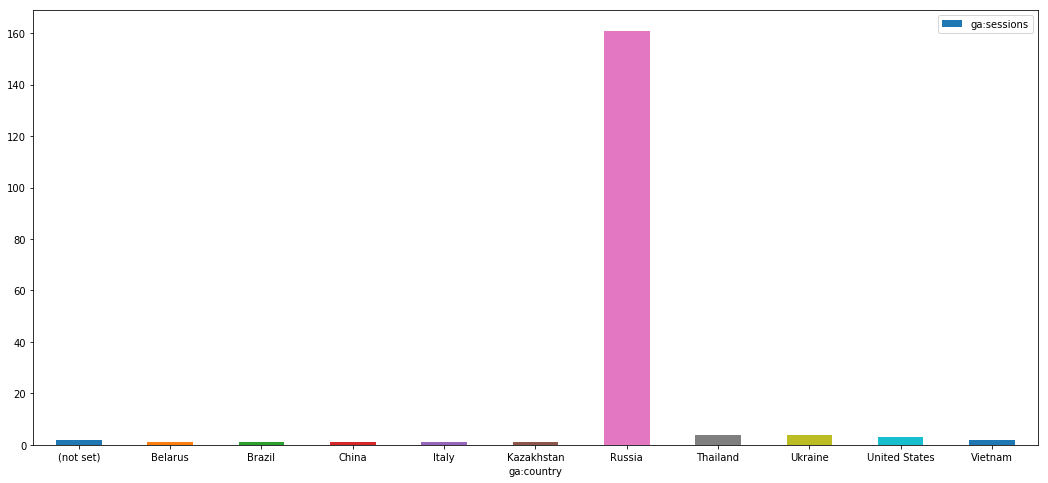

In [52]:
tcountries = countries.astype({'ga:sessions': 'float'})
tcountries.plot.bar(x='ga:country', y='ga:sessions', rot=0)